In [1]:
#math and linear algebra stuff
import numpy as np

#plots
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15.0, 15.0)
#mpl.rc('text', usetex = True)
import matplotlib.pyplot as plt
%matplotlib inline

# Second order methods

This notebook intends to give an extremely simple introduction to second order optimization methods.

## Newton method

Newton method is a really simple method originally designed in order to find iteratively the root of a function (where it is zero valued), we will see later some conditions that must be met in order to ensure the algorithm convergence.

One of the first condition is simply to be sure that the function under consideration, for instance $f : \underset{\mathbb{R}^n}{x}\mapsto \underset{\mathbb{R}}{f(x)}$, crosses the X axis of the graph at some point.

The basic idea of newton method is to linearize the function at the current estimate, find the root of the linear approximation, and assign its value to the current estimate before starting a new iteration.

The linear estimation $f_{lin}$ at point $a$, using Taylor serie gives:

\begin{align*}
    f_{lin,a}(x) = f(a) + \langle x-a, \nabla f(a) \rangle
\end{align*}

equating $f_{lin,a}(x)$ to zero leads to:

\begin{align*}
    f_{lin,a}(x) &= 0\\
    f(a) + \langle \nabla f(a),x-a\rangle &= 0\\
    \langle \nabla f(a),x\rangle -\langle \nabla f(a),a\rangle &= -f(a)\\
    \langle \nabla f(a),x\rangle &= \langle \nabla f(a),a\rangle -f(a)
\end{align*}

This simple linear equality defines an hyperplan onto which the current solution can be projected in order to get the next iterate.

Here is a simple overview of the process for a 1D case:

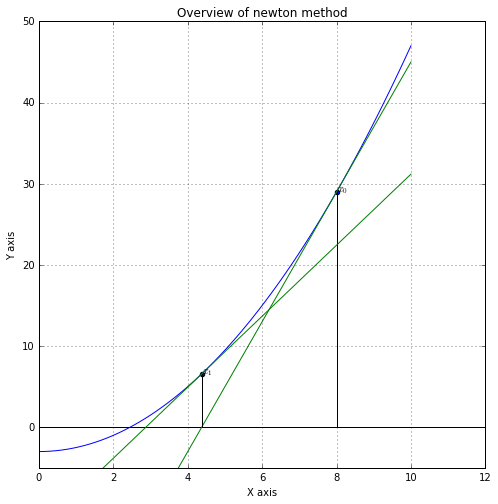

In [38]:
x=np.linspace(-5,10,100)
f = lambda x : 0.5*x**2-3
f1 = lambda x : x
def ftayl(a):
    def fa(x):
        return f(a)+(x-a)*f1(a)
    return fa

fig=plt.figure(0,figsize=(8,8))
ax=fig.add_subplot(111)
plt.title("Overview of newton method")
plt.xlabel('X axis')
plt.ylabel('Y axis')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xlim(0,12)
plt.ylim(-5,50)

#Plot original function
plt.plot(x,f(x))

#Plot estimate 0
x0 = 8
plt.scatter(x0,f(x0))
plt.plot([x0,x0],[0,f(x0)],'k')
ax.annotate('$x_0$',(x0,f(x0)))

#plot linearization in x0
plt.plot(x,ftayl(x0)(x),'g')

#Plot estimate 1
x1 = x0-f(x0)/f1(x0)
plt.plot([x1,x1],[0,f(x1)],'k')
plt.scatter(x1,f(x1))
ax.annotate('$x_1$',(x1,f(x1)))

#plot linearization in x1
plt.plot(x,ftayl(x1)(x),'g')

## Extending Newton method for convex optimization

We are generally not really interested in finding the root of a objective function, because there is very few chances that we would ever be able to prove it exists.
However, when manipulating functions that are convex and 2 time differentiables, we know, thanks to Fermat theorem, that its derivative vanishes at the optimal point. So finding the root of the derivative of our objective seems to be a much more interesting challenge.

We will replace $f(x)$ by $\nabla f(x)$ in our previous equations to obtain the desired equation update:

\begin{align*}
    f1_{lin,a}(x) &= 0\\
    \nabla f(a) + \langle H f(a),x-a\rangle &= 0
\end{align*}
